In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
sessions = pd.read_csv('sessions.csv')
sessions = sessions.fillna(0)

# reformat dates
sessions['date'] = pd.to_datetime(sessions.date)

In [3]:
sessions.columns

Index(['date', 'monkey', 'cycle', 'phase', 'location', 'kg', 'mood', 'rm',
       'stable', 'max_full', 'total', 'total6', '4', '5a', '5b', '5c', '6a',
       '6a+', '6b', '6b+', '6c', '6c+', '7a', '7a+', '7b', '7b+', '7c', '7c+',
       '8a'],
      dtype='object')

In [4]:
sessions.head()

,date,monkey,cycle,phase,location,kg,mood,rm,stable,max_full,...,6b+,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a
0,2018-03-25,doripa,1,marathon,bb1,78.0,0.0,9.0,6a,6b+,...,4.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-03-25,sunshine,1,marathon,bb1,60.0,0.0,9.0,5c,6b+,...,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-03-27,doripa,1,technique,bf,78.0,0.0,6.0,6b,6b+,...,2.0,0.25,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0
3,2018-03-29,doripa,1,4x4,bb2,78.0,0.0,5.0,6b,6b,...,0.0,0.00,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-03-29,sunshine,1,4x4,bb2,60.0,0.0,5.0,5c,6a+,...,0.0,0.00,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
scores_translator = {
    '4': 4,
    '5a': 8,
    '5b': 9,
    '5c': 10,
    '6a': 20,
    '6a+': 21,
    '6b': 30,
    '6b+': 40,
    '6c': 45,
    '6c+': 50,
    '7a': 80,
    '7a+': 90,
}

def calc_score(row):
    s = [row[key] * scores_translator[key] for key in scores_translator]
    return sum(s)



In [6]:
scores = sessions.apply(calc_score, axis=1)
sessions['scores'] = scores
sessions

,date,monkey,cycle,phase,location,kg,mood,rm,stable,max_full,...,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a,scores
0,2018-03-25,doripa,1,marathon,bb1,78.0,0.0,9.0,6a,6b+,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1012.00
1,2018-03-25,sunshine,1,marathon,bb1,60.0,0.0,9.0,5c,6b+,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,556.00
2,2018-03-27,doripa,1,technique,bf,78.0,0.0,6.0,6b,6b+,...,0.25,0.00,0.0,1.5,0.0,0.0,0.0,0.0,0.0,508.25
3,2018-03-29,doripa,1,4x4,bb2,78.0,0.0,5.0,6b,6b,...,0.00,0.50,0.5,0.0,0.0,0.0,0.0,0.0,0.0,430.00
4,2018-03-29,sunshine,1,4x4,bb2,60.0,0.0,5.0,5c,6a+,...,0.00,0.00,0.5,0.0,0.0,0.0,0.0,0.0,0.0,184.00
5,2018-03-31,doripa,1,project,bf,78.0,0.0,6.0,6b,6b+,...,0.00,0.25,0.5,0.0,0.0,0.0,0.0,0.0,0.0,619.50
6,2018-02-04,doripa,1,project,bb1,78.0,0.0,4.0,6b,6c+,...,0.00,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,678.50
7,2018-04-04,doripa,1,project,bf,78.0,0.0,4.0,6b,6c,...,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,606.00
8,2018-06-04,doripa,1,arc,bf,78.0,0.0,2.0,5c,5c,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,258.00
9,2018-06-04,doripa,1,project,bb2,78.0,0.0,5.0,6b,6c+,...,5.00,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,984.00


In [7]:
doripa = sessions[sessions.monkey == 'doripa']
sunshine_sessions = sessions[sessions.monkey == 'sunshine']

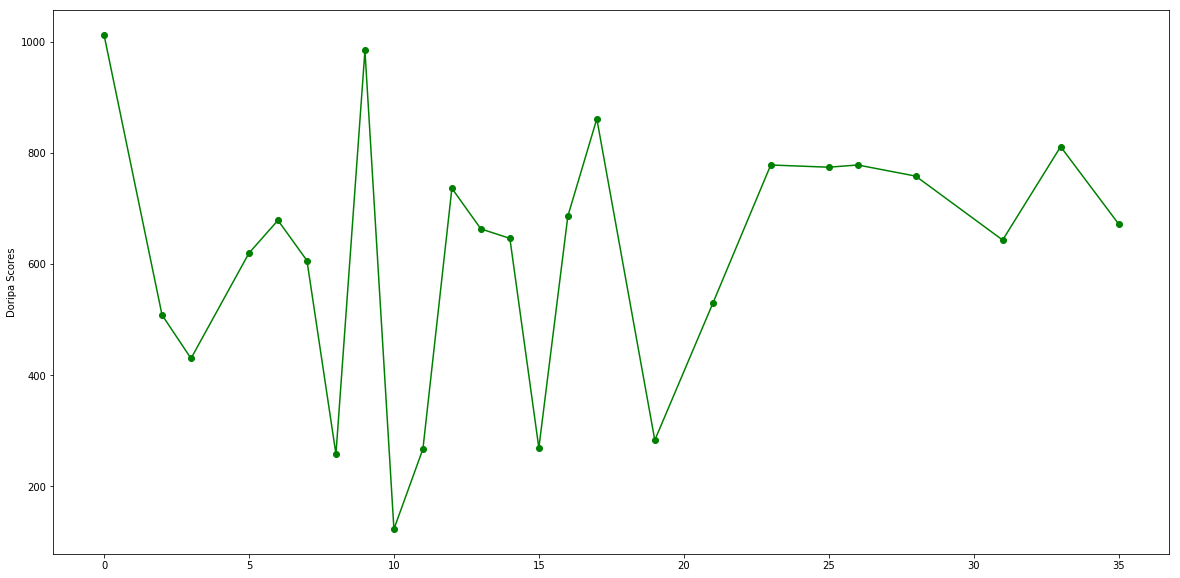

In [8]:
plt.figure(figsize=(20,10))
plt.plot(doripa.scores, marker='o', color='green')
plt.ylabel('Doripa Scores')
plt.show()

In [9]:
sunshine_sessions

,date,monkey,cycle,phase,location,kg,mood,rm,stable,max_full,...,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a,scores
1,2018-03-25,sunshine,1,marathon,bb1,60.0,0.0,9.0,5c,6b+,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,556.0
4,2018-03-29,sunshine,1,4x4,bb2,60.0,0.0,5.0,5c,6a+,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,184.0
18,2018-04-28,sunshine,2,base,bb1,59.0,0.0,6.0,5c,6a+,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.0
20,2018-01-05,sunshine,2,base,bf,59.0,6.0,6.0,5a,5c,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173.0
22,2018-03-05,sunshine,2,base,bb2,59.0,7.0,6.0,5c,6a,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0
24,2018-06-05,sunshine,2,base,bb2,59.0,7.0,7.0,5b,6a,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212.0
27,2018-08-05,sunshine,2,base,bb2,59.0,7.0,6.0,5c,6a,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,259.0
29,2018-11-05,sunshine,2,base,bb1,59.0,4.0,7.0,5c,6a,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0
30,2018-05-16,sunshine,2,base,bb2,59.0,3.0,6.0,5c,6a+,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,236.0
32,2018-05-18,sunshine,2,base,bb1,59.0,7.0,7.5,5c,6a+,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,503.0


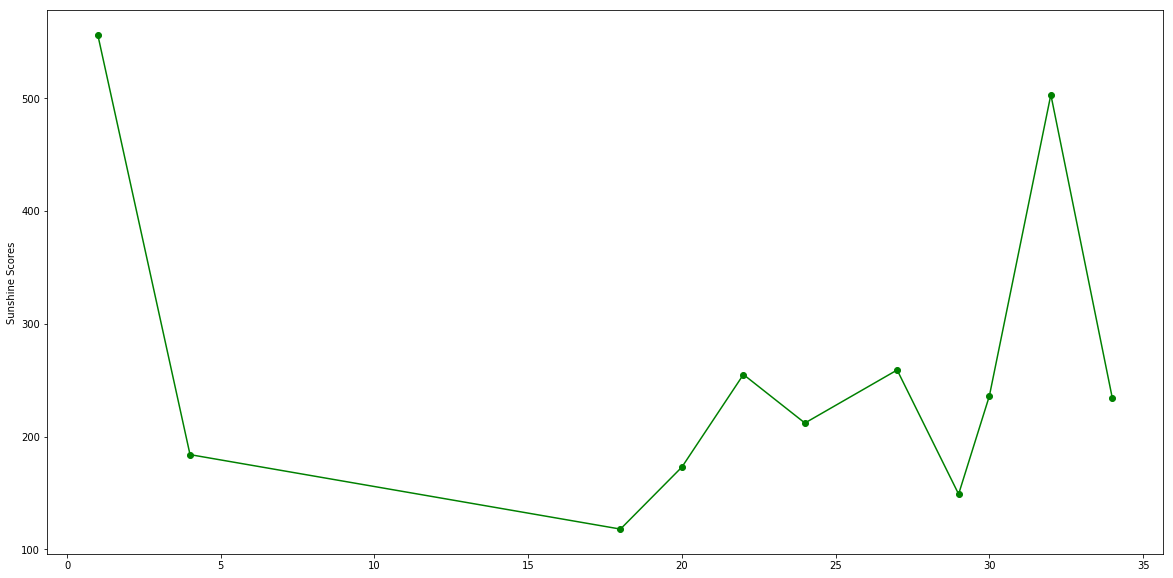

In [10]:
plt.figure(figsize=(20,10))
plt.plot(sunshine_sessions.scores,  marker='o', color='green')
plt.ylabel('Sunshine Scores')
plt.show()

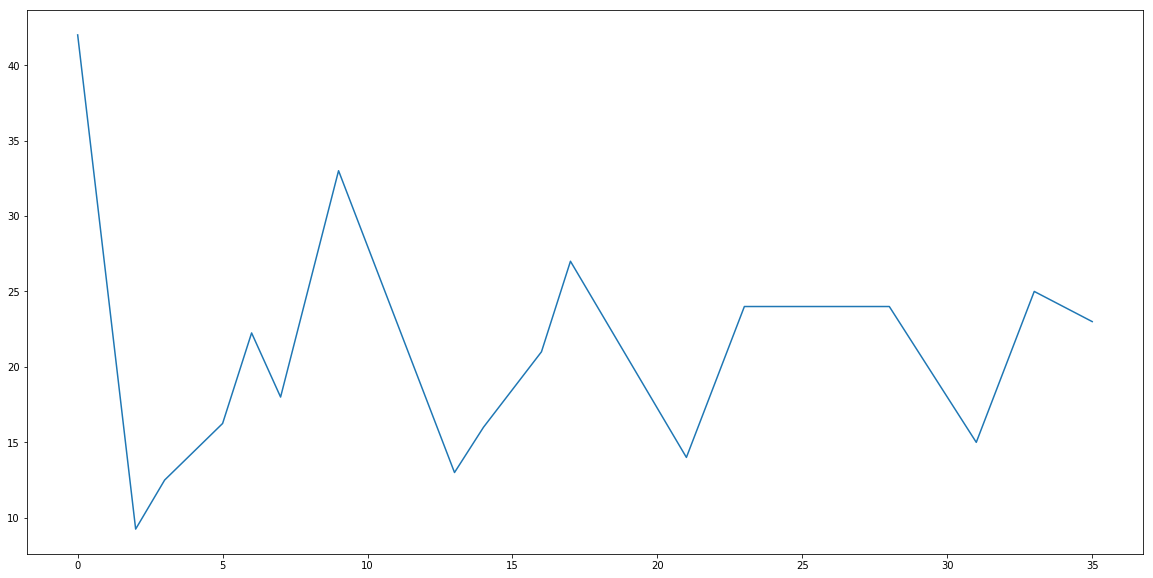

In [11]:
no_arcing = doripa[doripa.phase != 'arc']
plt.figure(figsize=(20,10))
plt.plot(no_arcing['total6'])
plt.show()

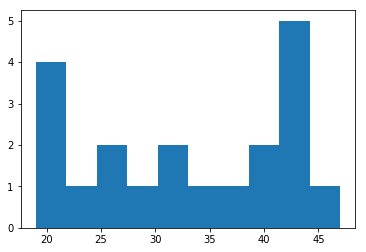

In [12]:
plt.hist(no_arcing['total'])
plt.show()

In [13]:
doripa.corr()

,cycle,kg,mood,rm,total,total6,4,5a,5b,5c,...,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a,scores
cycle,1.000000,-0.632939,0.798611,0.173135,0.461040,0.273519,0.542005,0.156262,-0.038622,0.033413,...,0.265383,-0.254413,-0.263181,-0.112204,NaN,NaN,NaN,NaN,NaN,0.286213
kg,-0.632939,1.000000,-0.805063,-0.426237,-0.533768,-0.293284,-0.846988,-0.308121,0.177170,0.055465,...,-0.291850,0.325343,0.175318,0.202534,NaN,NaN,NaN,NaN,NaN,-0.304616
mood,0.798611,-0.805063,1.000000,0.232336,0.570652,0.251033,0.718403,0.388358,-0.032795,0.048332,...,0.208370,-0.410501,-0.218599,-0.150239,NaN,NaN,NaN,NaN,NaN,0.274868
rm,0.173135,-0.426237,0.232336,1.000000,0.367628,0.713819,0.358260,-0.334585,-0.589794,-0.584901,...,0.390441,0.181534,0.135157,0.101395,NaN,NaN,NaN,NaN,NaN,0.727746
total,0.461040,-0.533768,0.570652,0.367628,1.000000,0.597137,0.473572,0.459846,0.033513,0.123861,...,0.246207,-0.150059,-0.479416,-0.372690,NaN,NaN,NaN,NaN,NaN,0.590486
total6,0.273519,-0.293284,0.251033,0.713819,0.597137,1.000000,0.241982,-0.367174,-0.674354,-0.618631,...,0.443598,0.272486,-0.058806,-0.176352,NaN,NaN,NaN,NaN,NaN,0.963337
4,0.542005,-0.846988,0.718403,0.358260,0.473572,0.241982,1.000000,0.281517,-0.152129,-0.171031,...,0.191879,-0.278600,-0.123876,-0.173436,NaN,NaN,NaN,NaN,NaN,0.268215
5a,0.156262,-0.308121,0.388358,-0.334585,0.459846,-0.367174,0.281517,1.000000,0.584443,0.682297,...,-0.143706,-0.477711,-0.519895,-0.155728,NaN,NaN,NaN,NaN,NaN,-0.353135
5b,-0.038622,0.177170,-0.032795,-0.589794,0.033513,-0.674354,-0.152129,0.584443,1.000000,0.796074,...,-0.407109,-0.231206,-0.381039,-0.085210,NaN,NaN,NaN,NaN,NaN,-0.663481
5c,0.033413,0.055465,0.048332,-0.584901,0.123861,-0.618631,-0.171031,0.682297,0.796074,1.000000,...,-0.242220,-0.379455,-0.294471,-0.311397,NaN,NaN,NaN,NaN,NaN,-0.601728


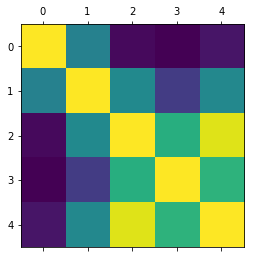

In [14]:
plt.matshow(doripa[['mood', 'total', 'total6', 'rm', 'scores']].corr());

In [15]:
doripa[['mood', 'total', 'total6', 'rm', 'scores']].corr()

,mood,total,total6,rm,scores
mood,1.000000,0.570652,0.251033,0.232336,0.274868
total,0.570652,1.000000,0.597137,0.367628,0.590486
total6,0.251033,0.597137,1.000000,0.713819,0.963337
rm,0.232336,0.367628,0.713819,1.000000,0.727746
scores,0.274868,0.590486,0.963337,0.727746,1.000000


In [16]:
doripa['total'].corr(doripa['total6'])

0.59713736254082639

In [17]:
doripa['total'].corr(doripa['scores'])

0.5904862551662089

In [18]:
doripa['scores'].corr(doripa['rm'])

0.72774643496270086

In [19]:
doripa['scores'].corr(doripa['total6'])

0.96333719662082018

In [20]:
sunshine_sessions.corr()['scores']

cycle    -0.382325
kg        0.382325
mood      0.004618
rm        0.772560
total     0.946741
total6    0.981981
4        -0.408136
5a        0.816043
5b        0.694241
5c        0.220356
6a        0.662622
6a+       0.770592
6b        0.621061
6b+       0.684297
6c       -0.016693
6c+            NaN
7a       -0.184117
7a+            NaN
7b             NaN
7b+            NaN
7c             NaN
7c+            NaN
8a             NaN
scores    1.000000
Name: scores, dtype: float64

In [21]:
doripa.corr()['scores']

cycle     0.286213
kg       -0.304616
mood      0.274868
rm        0.727746
total     0.590486
total6    0.963337
4         0.268215
5a       -0.353135
5b       -0.663481
5c       -0.601728
6a        0.763176
6a+       0.748818
6b        0.698991
6b+       0.612899
6c        0.497538
6c+       0.326434
7a        0.079711
7a+      -0.089632
7b             NaN
7b+            NaN
7c             NaN
7c+            NaN
8a             NaN
scores    1.000000
Name: scores, dtype: float64